**MUHAMMAD MUFTI ARDANI (221111001)**

**KLASIFIKASI NEGATIF, POSITIF, DAN NETRAL**

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         522 non-null    object
 1   cleaning          522 non-null    object
 2   case_folding      522 non-null    object
 3   normalisasi       522 non-null    object
 4   tokenizing        522 non-null    object
 5   stopword_removal  522 non-null    object
 6   stemming          522 non-null    object
dtypes: object(7)
memory usage: 28.7+ KB


In [ ]:
data = pd.DataFrame(data[['stemming']])
data.head(5)

,stemming
0,amerika ngebom ikn proyek tolol bom mangkrak n...
1,jokowi takut ikn dihambalangkan kali surabaya ...
2,kota pindah ikn alas jakarta tenggelam kembang...
3,kota pindah ikn oligarki jajah kuasa jakarta p...
4,gedung terminal genang air surut sisa lumpur g...


In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon postif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
          sentiment = "Positif"
        elif sentiment_score < 0:
          sentiment = "Negatif"
        else:
          sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['stemming'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(5)

,stemming,Score,Sentiment
0,amerika ngebom ikn proyek tolol bom mangkrak n...,-2,Negatif
1,jokowi takut ikn dihambalangkan kali surabaya ...,-7,Negatif
2,kota pindah ikn alas jakarta tenggelam kembang...,0,Netral
3,kota pindah ikn oligarki jajah kuasa jakarta p...,-1,Negatif
4,gedung terminal genang air surut sisa lumpur g...,-8,Negatif


/tmp/ipython-input-4-2040608762.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


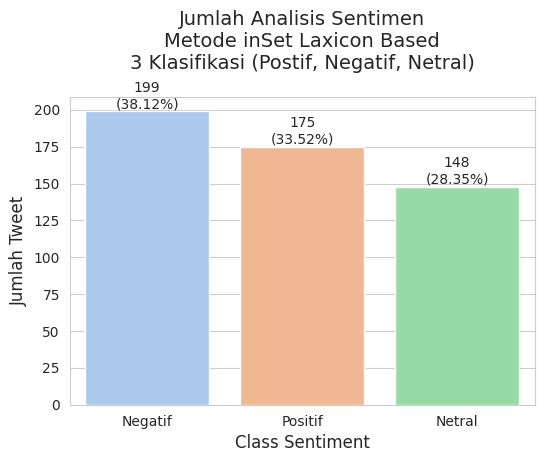

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen\nMetode inSet Laxicon Based\n3 Klasifikasi (Postif, Negatif, Netral)', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

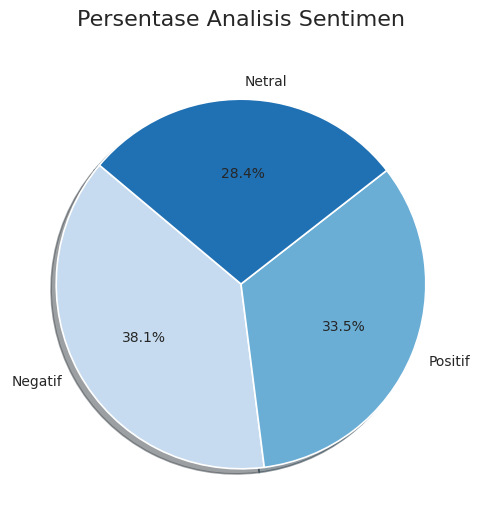

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
labels = sentiment_count.index
sizes = sentiment_count.values

# Menggunakan palet warna soft dari seaborn
colors = sns.color_palette('Blues', len(labels))

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    shadow=True
)
plt.title('Persentase Analisis Sentimen', fontsize=16, pad=20)
plt.show()

In [ ]:
data.to_csv("Hasil_Pelabelan_Data_3Class.csv", encoding='utf8', index=False)

**KLASIFIKASI POSITIF DAN NEGATIF**

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         522 non-null    object
 1   cleaning          522 non-null    object
 2   case_folding      522 non-null    object
 3   normalisasi       522 non-null    object
 4   tokenizing        522 non-null    object
 5   stopword_removal  522 non-null    object
 6   stemming          522 non-null    object
dtypes: object(7)
memory usage: 28.7+ KB


In [ ]:
data = pd.DataFrame(data[['stemming']])
data.head(5)

,stemming
0,amerika ngebom ikn proyek tolol bom mangkrak n...
1,jokowi takut ikn dihambalangkan kali surabaya ...
2,kota pindah ikn alas jakarta tenggelam kembang...
3,kota pindah ikn oligarki jajah kuasa jakarta p...
4,gedung terminal genang air surut sisa lumpur g...


In [ ]:
import pandas as pd
import random

# Unduh kamus leksikon postif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_url)
        negative_count = sum(1 for word in text.split() if word in negative_url)
        sentiment_score = positive_count - negative_count

        # Jika skor 0, ubah menjadi positif atau negatif secara acak
        if sentiment_score == 0:
          sentiment_score = random.choice([1, -1])

        if sentiment_score > 0:
          sentiment = "Positif"
        else:
          sentiment = "Negatif"

        return sentiment_score, sentiment
    return 0, "Negatif"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['stemming'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(5)

,stemming,Score,Sentiment
0,amerika ngebom ikn proyek tolol bom mangkrak n...,-1,Negatif
1,jokowi takut ikn dihambalangkan kali surabaya ...,-1,Negatif
2,kota pindah ikn alas jakarta tenggelam kembang...,-1,Negatif
3,kota pindah ikn oligarki jajah kuasa jakarta p...,1,Positif
4,gedung terminal genang air surut sisa lumpur g...,1,Positif


/tmp/ipython-input-10-1379959381.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


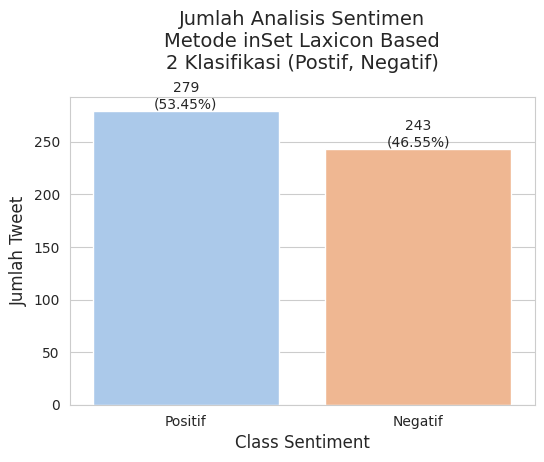

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen\nMetode inSet Laxicon Based\n2 Klasifikasi (Postif, Negatif)', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv("Hasil_Pelabelan_Data_2Class.csv", encoding='utf8', index=False)